#### Customer Churn Analysis
#### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [3]:
# READING THE DATASET
df=pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- As we can see, this dataset is all about customer retention of the telecommunication sectors. There are multitiple factors involve to retain a customer of an organization. In this dataset we have got 20 such independent variables, depending upon these variables we need to predict customer churn. And as the independent variable is a categorical data, hence it is a classification type of problem. The dataset is a good mixture of nominal, numerical and discrete data.

In [3]:
df.shape

(7043, 21)

-  There are 7043 rows and 21 columns in this dataset.

In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

- Different columns are containing different counts of categories like, gender column is having 2 categories. The target variable, Churn is having 2 categories , so it is a binary-class classification.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Seems that TotalCharges column is a continuous data that is showing object datatype, we need to covert that.
- There is no missing value present in the dataset.
- This dataset is a good blend of continuous, categorical and nominal data.

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- As we can see the dataset is a mixture of nominal, continuous and categorical values.
- Total charges which is a nominal value here, should be a numerical value that we need to convert.

Let's do it:

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- As we can see, after conversion TotalCharges column is having 11 missing values that we need to take care. Let's do it.

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- Now we can see, the TotalCharges data is converted to continuous data.
- We need to get rid of the missing values from TotalCharges column.

Let's check missing values of TotalCharges column:

In [9]:
df.loc[df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- The 11 missing values of TotalCharges column is visible.

In [10]:
df.dropna(how = 'any', inplace = True)

- We have dropped only 0.15% data, to deal with the missing values.

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- As we can see, there is no missing value present in the dataset.

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- There is no missing value present in any of the continuous features.
- SeniorCitizen is actually a categorical hence, the 25%-50%-75% distribution is not in proper manner.
- Minimum Tenure is 1 month maybe and maximum tenure is 72 months or 6 years.
- Minimum Monthly Charge is 18.25 and maximum Monthly Charge is 118.75
- Minimum Total Charge is 18.80 and maximum Total Charge is 8684.80. The range of quartile-3 and maximum data is huge, skewness might be present there.

#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:

#### Univariate Analysis:

Minimum 1
Maximum 72


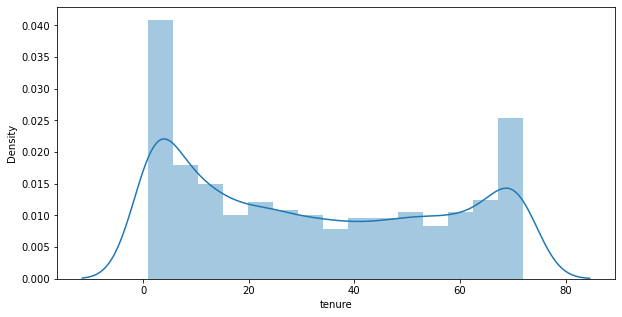

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df['tenure'])
print('Minimum',df['tenure'].min())
print('Maximum',df['tenure'].max())

- The minimum Tenure is 1 and maximum tenure is 72. And the data is little deviated.

Minimum 18.8
Maximum 8684.8


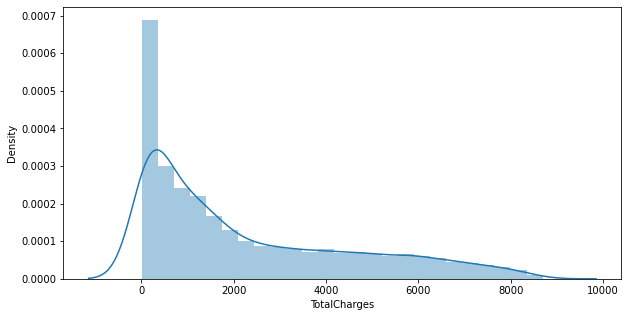

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(df['TotalCharges'])
print('Minimum',df['TotalCharges'].min())
print('Maximum',df['TotalCharges'].max())

- The minimum TotalCharges is 18.8 that is close to minimum of monthly charges, that means people might be stop using the service after one month onwards and maximum value is 8684.8. 
- The value of the feature is deviated.

Minimum 18.25
Maximum 118.75


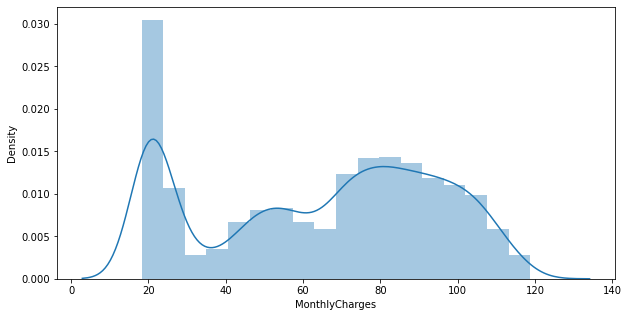

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(df['MonthlyCharges'])
print('Minimum',df['MonthlyCharges'].min())
print('Maximum',df['MonthlyCharges'].max())

- Minimum monthly charge is 18.25 and maximum value is 118.75. As we can see, the feature is bit deviated.


Now let's check the target variable( Churn ) :

No     5163
Yes    1869
Name: Churn, dtype: int64

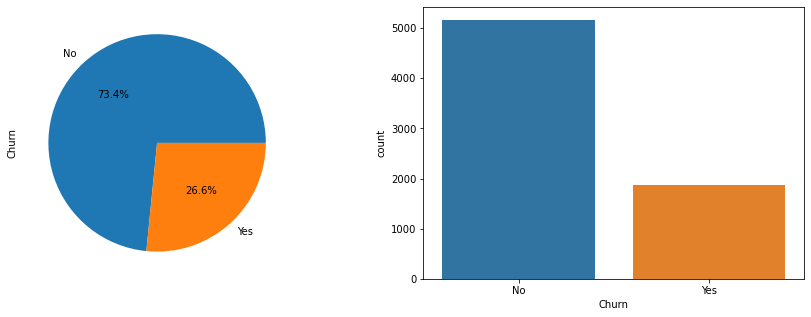

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(df['Churn'])
df['Churn'].value_counts()

- As we can see, the count of active customer is more than inactive customer. Like, Active Customer count is 5163 (73.4%) and inactive customer count is 1869 (26.6%).
- The target variable is imbalanced hence we need to balance the data before model creation.- 

Male      3549
Female    3483
Name: gender, dtype: int64

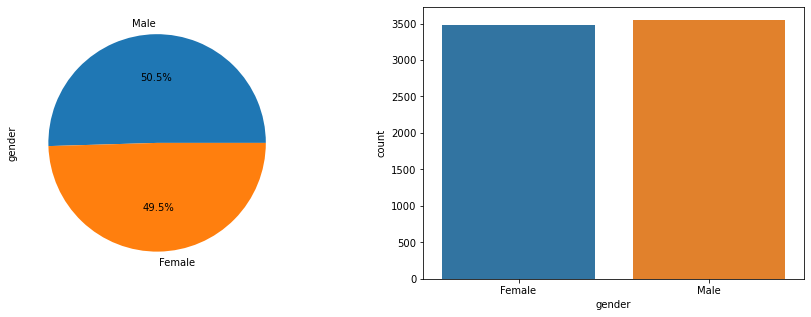

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['gender'])
df['gender'].value_counts()

- There are 3549 Customers are the male(50.5%) and 3483 Customers are female(49.5%).

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

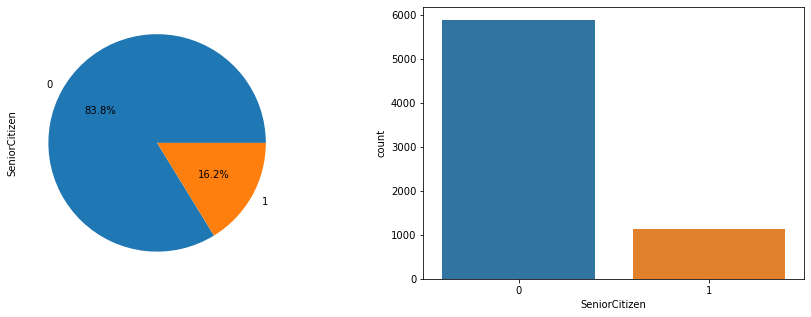

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['SeniorCitizen'])
df['SeniorCitizen'].value_counts()

- There are 5890 Customers are not senior citizen (83.8%) and 1142 Customers are senior citizen (16.2%).

No     3639
Yes    3393
Name: Partner, dtype: int64

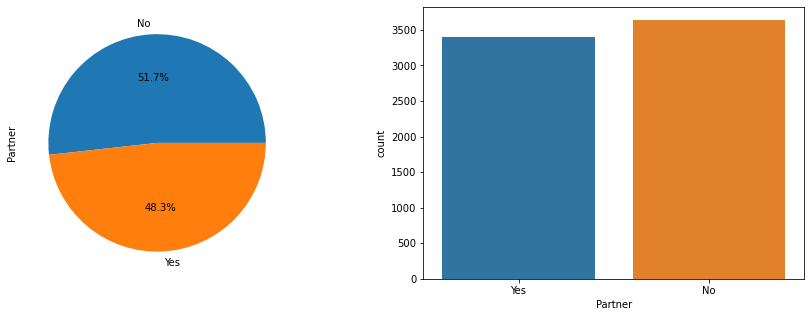

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Partner'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Partner'])
df['Partner'].value_counts()

-  There are 3639 Customers are not having partner (51.7%) and 3393 Customers are having partners (48.3%).

No     4933
Yes    2099
Name: Dependents, dtype: int64

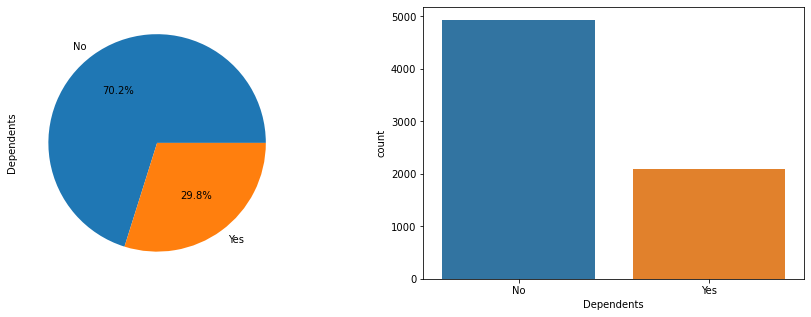

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

- 4933 (70.2%) count of customers do not have dependents whereas, 2099 (29.8%) count of customers are having dependents.

Yes    6352
No      680
Name: PhoneService, dtype: int64

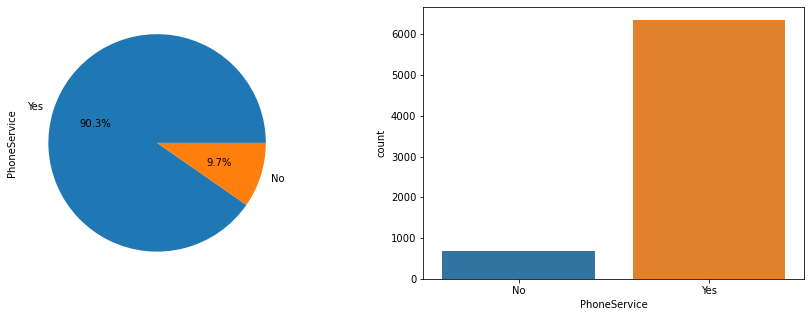

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['PhoneService'])
df['PhoneService'].value_counts()

- Count of customers with Phone Sevice is 6352 (90.3%) Whereas count of customers without Phone service is 680 (9.7%).

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

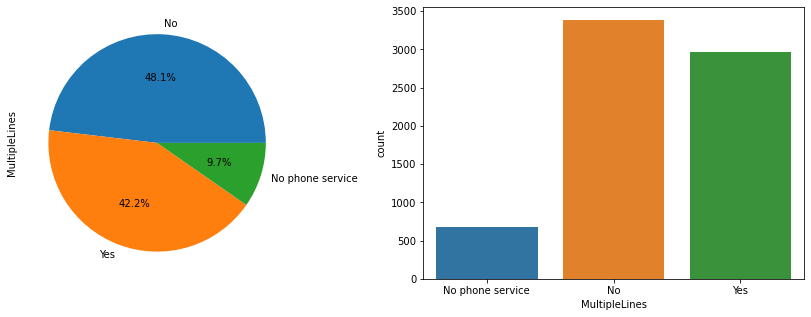

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['MultipleLines'])
df['MultipleLines'].value_counts()

- The count of customers without Multiple Lines is highest 3385 (48.1%). The count of customers with Multiple Lines is second highest 2967 (42.2%) And rest of the customers do not have phone service 680 (9.7%).

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

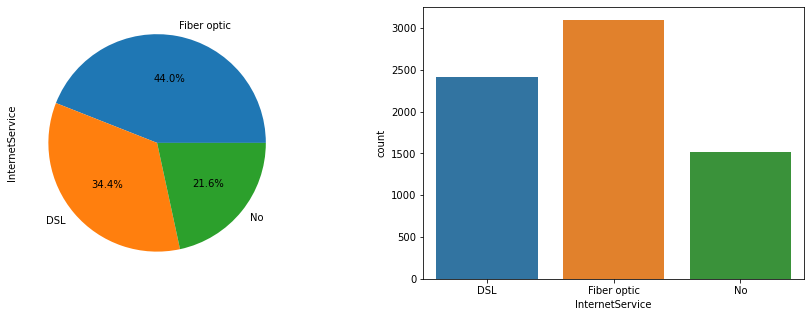

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['InternetService'])
df['InternetService'].value_counts()

- The count of customers using Fiber Optic internet service is highest 3096 (44.0), Customers using DSL internet service is 2nd highest 2416(34.4) and a good number of customers are not using any of these services or maybe do not use internet service, the count is 1520 (21.6%). 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

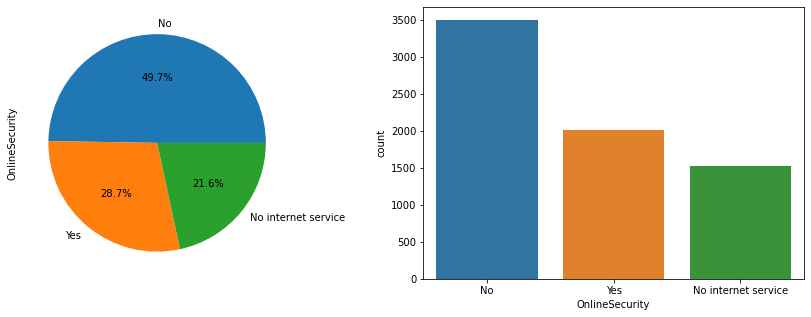

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['OnlineSecurity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['OnlineSecurity'])
df['OnlineSecurity'].value_counts()

- The count of customers without online security is highest 3497 (49.7%) and the count of customers with online security is 2nd highest 2015 (28.7%) and rest of the customers are without internet service 1520 (21.6%).

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

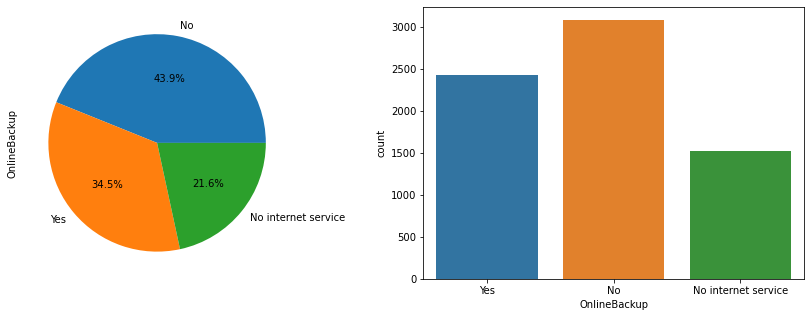

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['OnlineBackup'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['OnlineBackup'])
df['OnlineBackup'].value_counts()

- The count of customers without online backup is highest 3087 (43.9%) and the count of customers with online backup is 2nd highest 2425 (34.5%) and rest of the customers are without internet service 1520 (21.6%).

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

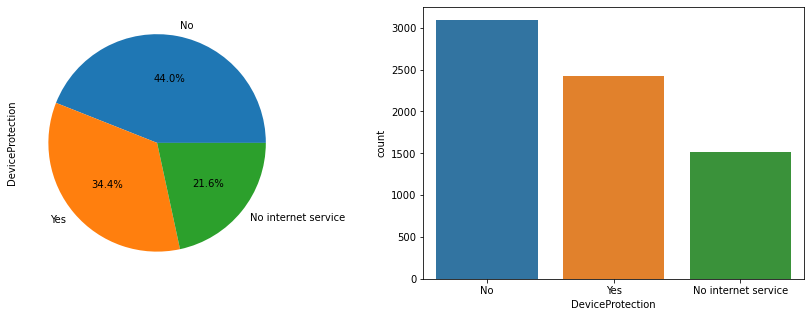

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['DeviceProtection'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['DeviceProtection'])
df['DeviceProtection'].value_counts()

-  The count of customers without Device protection is highest 3094 (44.0%) and the count of customers with Device protechtion is 2nd highest 2418 (34.4%) and rest of the customers are without internet service 1520 (21.6%).

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

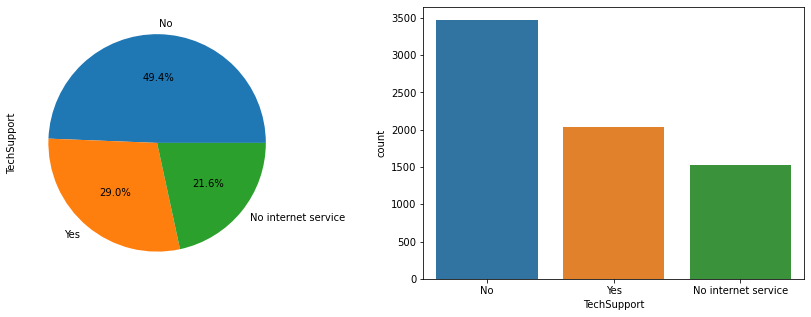

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['TechSupport'])
df['TechSupport'].value_counts()

- The count of customers without Tech Support is highest 3472 (49.4%) and the count of customers with Tech Support is 2nd highest 2040 (29.0%) and rest of the customers are without internet service 1520 (21.6%).

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

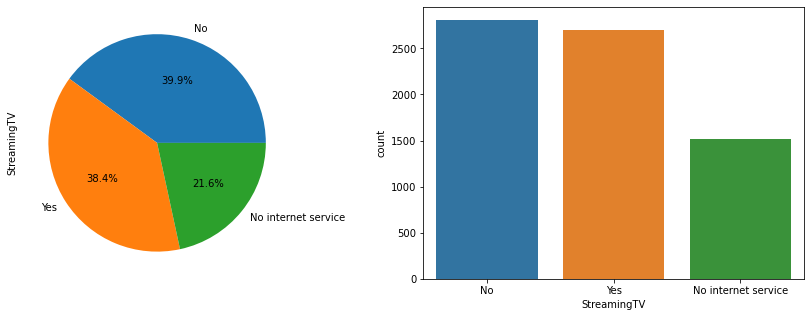

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['StreamingTV'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['StreamingTV'])
df['StreamingTV'].value_counts()

- The count of customers without Streaming TV is highest 2809 (39.9%) and the count of customers with Streaming TV is 2nd highest 2703 (38.4%) and rest of the customers are without internet service 1520 (21.6%).

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

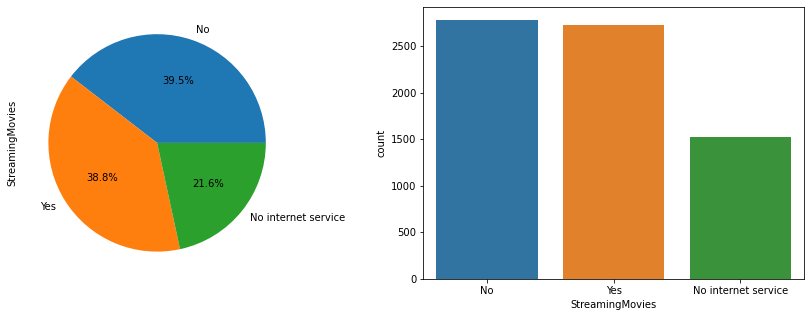

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['StreamingMovies'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['StreamingMovies'])
df['StreamingMovies'].value_counts()

- The count of customers without Streaming movies is highest 2781 (39.5%) and the count of customers with Streaming TV is 2nd highest 2731 (38.8%) and rest of the customers are without internet service 1520 (21.6%).

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

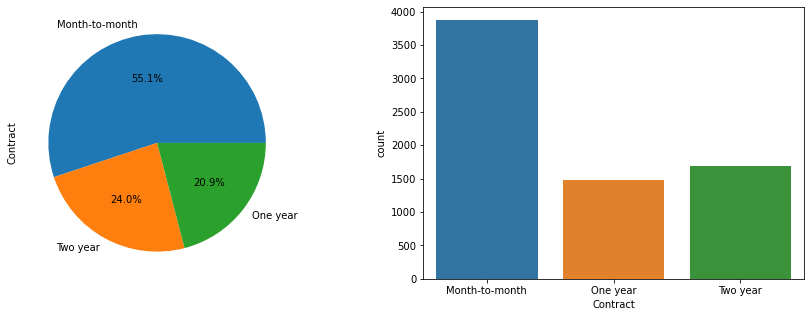

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Contract'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Contract'])
df['Contract'].value_counts()

-  The count of customers with  month to month Contract is highest 3875 (55.1%) and the count of customers with two year contract is 2nd highest 1685 (24.0%) and rest of the customers are like to have one year Contract 1472 (20.9%).

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

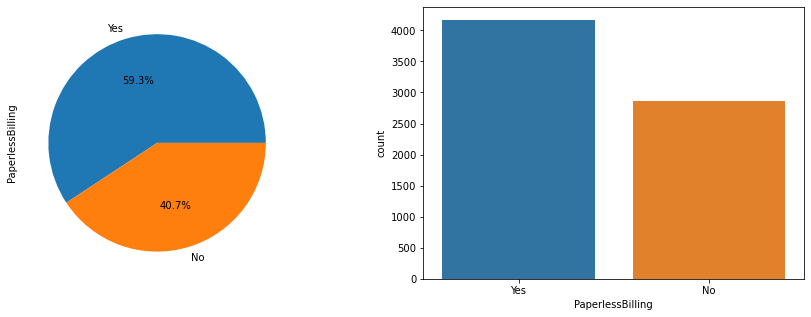

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['PaperlessBilling'])
df['PaperlessBilling'].value_counts()

- The count of Customers who prefer paperless billing is 4168 (59.3%) and who do not prefer paperless billing is 2864 (40.7%)

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

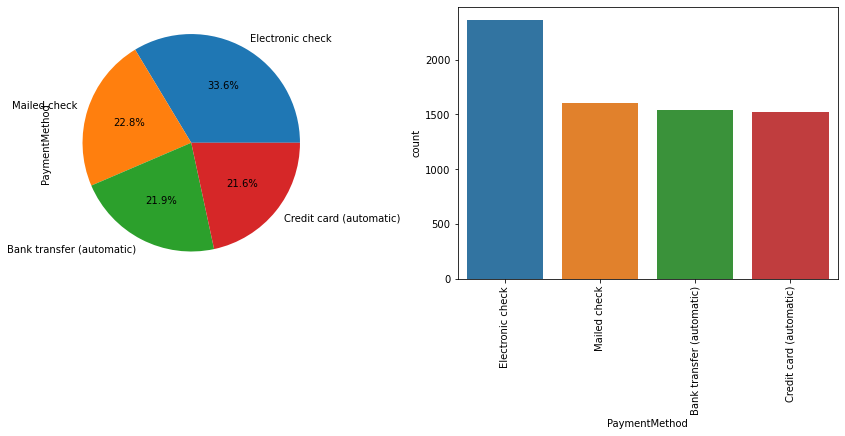

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['PaymentMethod'])
plt.xticks(rotation=90)
df['PaymentMethod'].value_counts()

- Customers are more into Electronic Check ( 2365 ) regarding Payment method and using of Credit card (automatic) is least(1521) regarding payment.


#### Outlier Detection:

We will check outliers in continuous features. Let's do it.

In [53]:
con_features=df[['tenure','MonthlyCharges','TotalCharges']]   # instantiating continuous features into a single variable

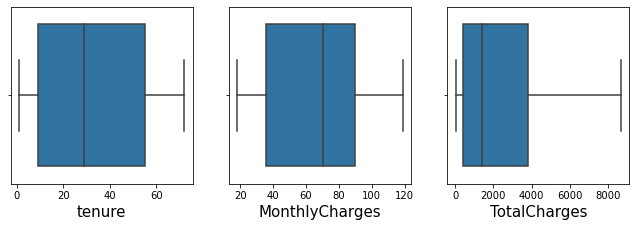

In [56]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(con_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- There is no Outliers as such present in the Continuous variables.

In [57]:
df.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

- Senior Citizen is a categorical data that we have already discussed.
- Total Charges column is having little right skewness that we need to take care. 


 Now we are going to check the relationship between target variable with features.

#### Bivariate Analysis:

In [59]:
#let's divide the target variable churn and features
y = df['Churn']
x = df.drop(columns=['Churn'])
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


- Checking the relations between Churn with continuous features first.

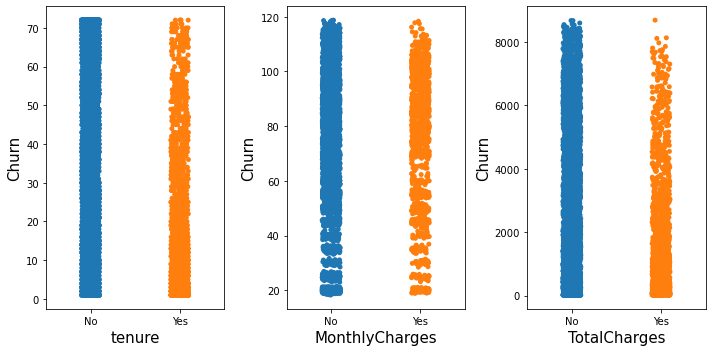

In [63]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.stripplot(y,con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

- Long duration of tenure is good for active customers. More long the tenure is more customer is actively using telecom.
- More monthly charge,there is a possibility to become inactive customer.
- Total charges is the accumulation of all charges. More total charges more active customers.

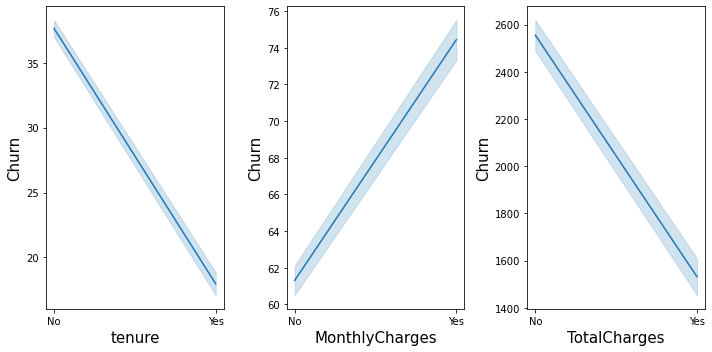

In [64]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.lineplot(y,con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

- More the tenure is more likly to get active customers.
- More the monthly charge is more likely to get inactive customers.
- As total charges is the addition of all charges so, more the active customers more the Total charges. 

Let's encode the target before checking the relations between target and categorical variables:

In [14]:
l = LabelEncoder()
l_s = ['Churn']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


- As we can see, the target variable 'Churn' is encoded into 0 and 1. ( 0 = Active Customer, 1 = Inactive Customer )

Now Let's check the relations as well.

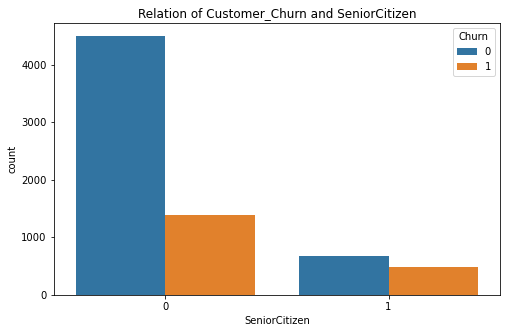

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,).set_title('Relation of Customer_Churn and SeniorCitizen')
plt.show()

- Most of the Senior citizen are the active customers.

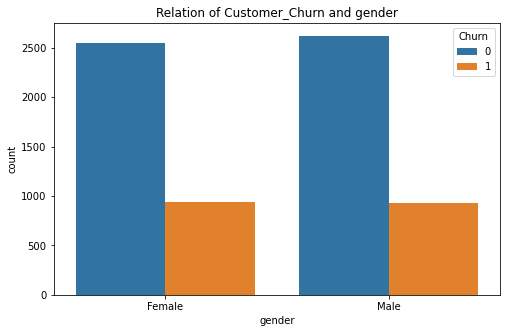

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',hue='Churn',data=df,).set_title('Relation of Customer_Churn and gender')
plt.show()

- Both in male and female categories there are more active customers than inactive customers.

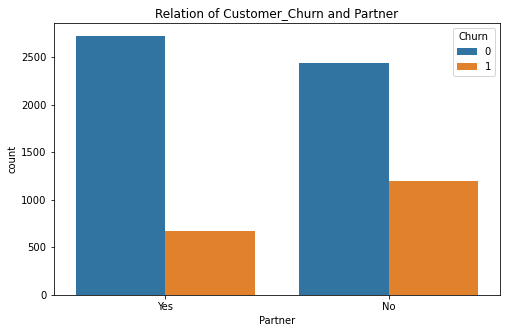

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Partner',hue='Churn',data=df,).set_title('Relation of Customer_Churn and Partner')
plt.show()

- Customers with partners are more likely to be active than customers without partners.

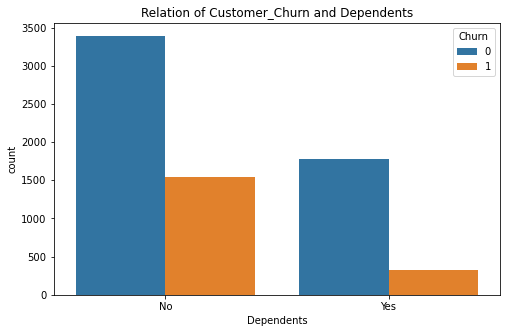

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Dependents',hue='Churn',data=df,).set_title('Relation of Customer_Churn and Dependents')
plt.show()

- Customers without dependents are more likely to be active than customers with dependents. Inactive customers without dependents are also there and the count is good.

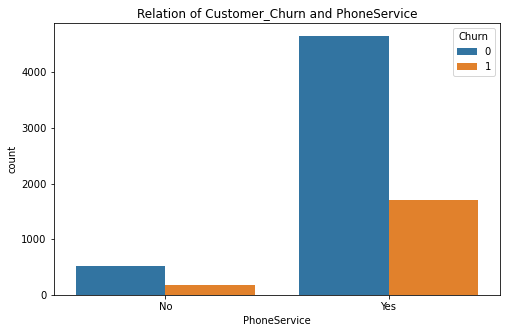

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='PhoneService',hue='Churn',data=df,).set_title('Relation of Customer_Churn and PhoneService')
plt.show()

- Customers with Phone Service is more and active than customers without Phone service.

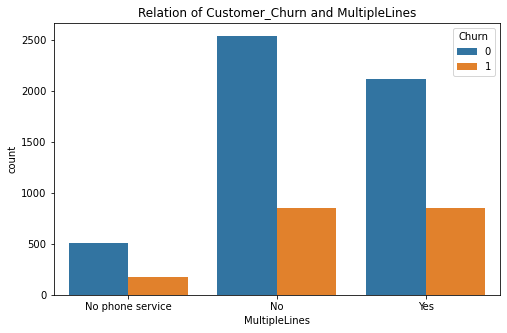

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='MultipleLines',hue='Churn',data=df,).set_title('Relation of Customer_Churn and MultipleLines')
plt.show()

- Customers without Multiple lines are more active than customers with Multiple lines and Customers with no phone service.

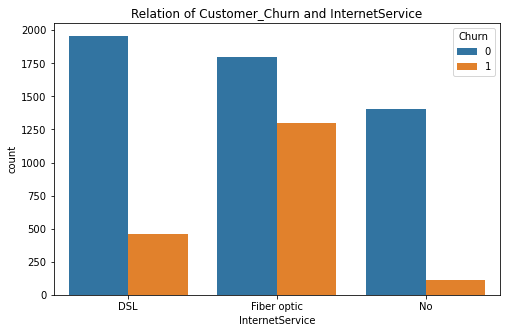

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService',hue='Churn',data=df,).set_title('Relation of Customer_Churn and InternetService')
plt.show()

- Active customers are more likely to use DSL Internet service, than customers with Fiber Optic Internet service.
- The count of inactive customers of Fiber optic internet service is huge. 

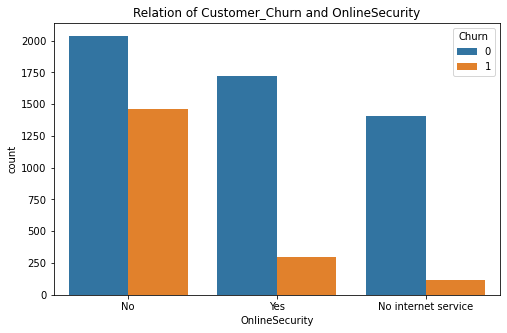

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='OnlineSecurity',hue='Churn',data=df,).set_title('Relation of Customer_Churn and OnlineSecurity')
plt.show()

- The Count of active customers without online security is highest and the count of inactive customers of the same category is also huge.
- Whereas the count of inactive customers with online security is very less regarding active customers of the category.

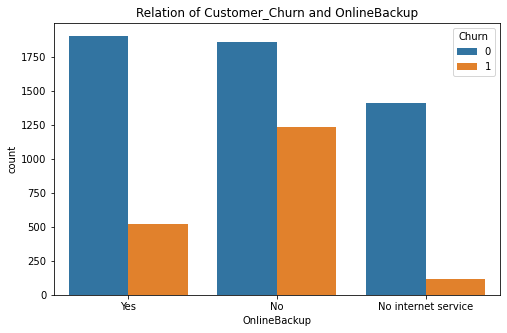

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='OnlineBackup',hue='Churn',data=df,).set_title('Relation of Customer_Churn and OnlineBackup')
plt.show()

- The Count of active customers with online backup and the Count of active customers without online backup is almost same and highest.
- Whereas the count of inactive customers without online backup is huge regarding active customers of the category.

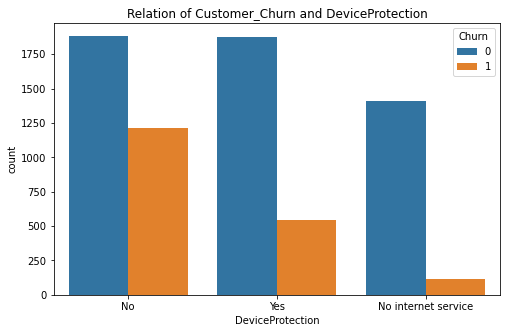

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='DeviceProtection',hue='Churn',data=df,).set_title('Relation of Customer_Churn and DeviceProtection')
plt.show()

- The Count of active customers with Device protection and the Count of active customers without device protection is almost same and highest.
- Whereas the count of inactive customers without device protection is huge regarding active customers of that category.

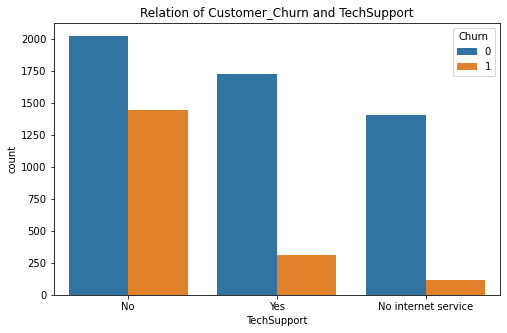

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='TechSupport',hue='Churn',data=df,).set_title('Relation of Customer_Churn and TechSupport')
plt.show()

- The Count of active customers without Tech Support is highest than customers with tech support.
- Whereas the count of inactive customers without Tech support is huge regarding active customers of the category.

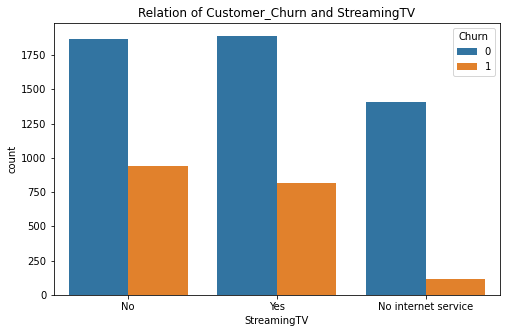

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='StreamingTV',hue='Churn',data=df,).set_title('Relation of Customer_Churn and StreamingTV')
plt.show()

- The Count of active customers with Streaming Tv and the Count of active customers without Streaming Tv is almost same and highest.
- Whereas the count of inactive customers without Streaming Tv is more than the inactive customers with Streaming tv service.

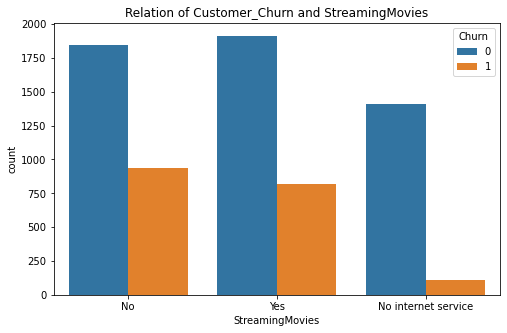

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='StreamingMovies',hue='Churn',data=df,).set_title('Relation of Customer_Churn and StreamingMovies')
plt.show()

- The Count of active customers with Streaming movies and the Count of active customers without Streaming movies is almost same and highest.
- Whereas the count of inactive customers without Streaming movies is more than the inactive customers with Streaming movies service.

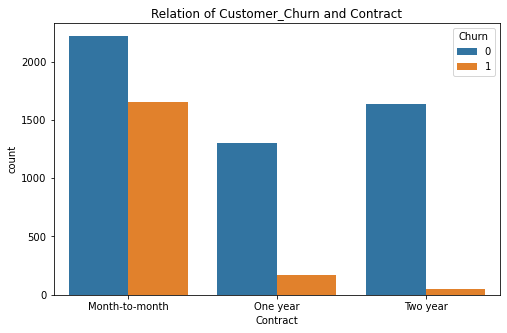

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract',hue='Churn',data=df,).set_title('Relation of Customer_Churn and Contract')
plt.show()

- Though active customers with month to month contract is highest but the inactive customers are also in huge numbers.
- Whereas active customers with 2 years contract and one year contract is a bit less but the inactive number of customers is significantly less.

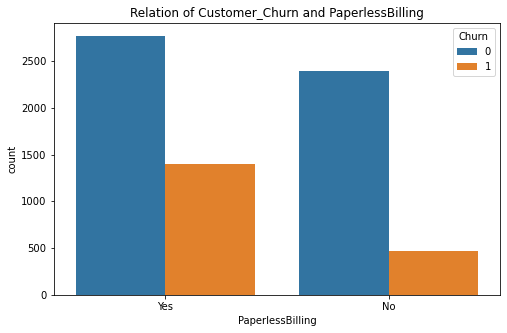

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaperlessBilling',hue='Churn',data=df,).set_title('Relation of Customer_Churn and PaperlessBilling')
plt.show()

- The count of active customers who use paperless billing is more than count of active customers who do not use paperless billing.
- The count of inactive customers who use paperless billing are also big.

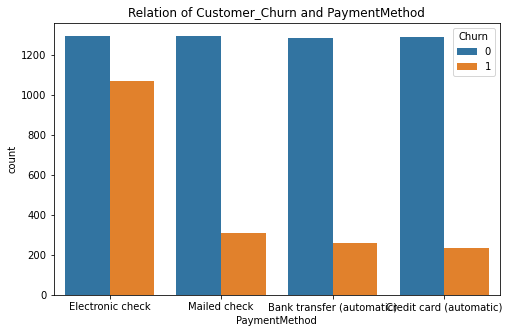

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod',hue='Churn',data=df,).set_title('Relation of Customer_Churn and PaymentMethod')
plt.show()

- Active customers use all the payment methods whereas count of inactive customers are highest in Electronic check method.

<Figure size 576x360 with 0 Axes>

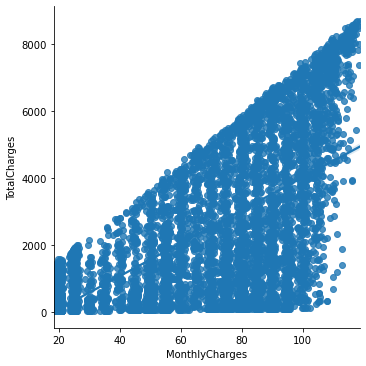

In [47]:
plt.figure(figsize=(8,5))
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df)
plt.show()

- As we can see, more the monthly charge more the total charge.

#### Mutivariate Analysis:

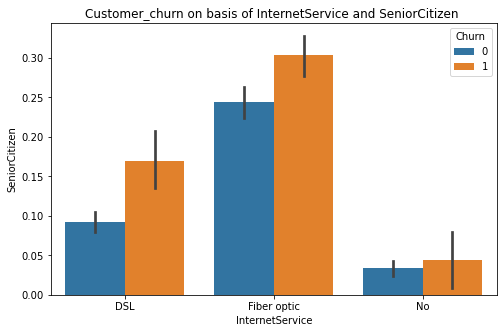

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='InternetService',y='SeniorCitizen',hue='Churn',data=df).set_title('Customer_churn on basis of InternetService and SeniorCitizen ')
plt.show()

- Inactive customers of Fiber optic internet service is highest than DSL internet service. In both cases inactive customers are more in count than active customers.

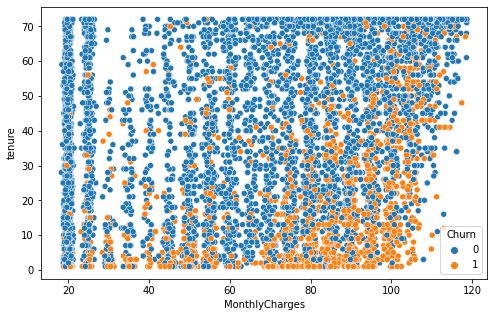

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='MonthlyCharges',y='tenure',hue='Churn',data=df)
plt.show()

- If tenure is less and monthly charge is more then there is more possibility to get inactive.

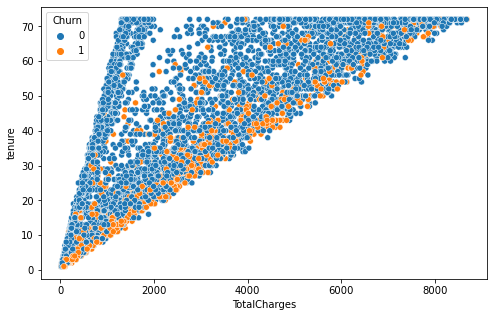

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',data=df)
plt.show()

- If tenure is more then Total charges is also more. Customers tend to get inactive in case of more total charge with less tenure coverage.


##### Plotting heatmap (correlation matrix):
Let's try to see if we can reduce the features using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

In [58]:
corr=df.corr() #checking the shape first
corr.shape

(5, 5)

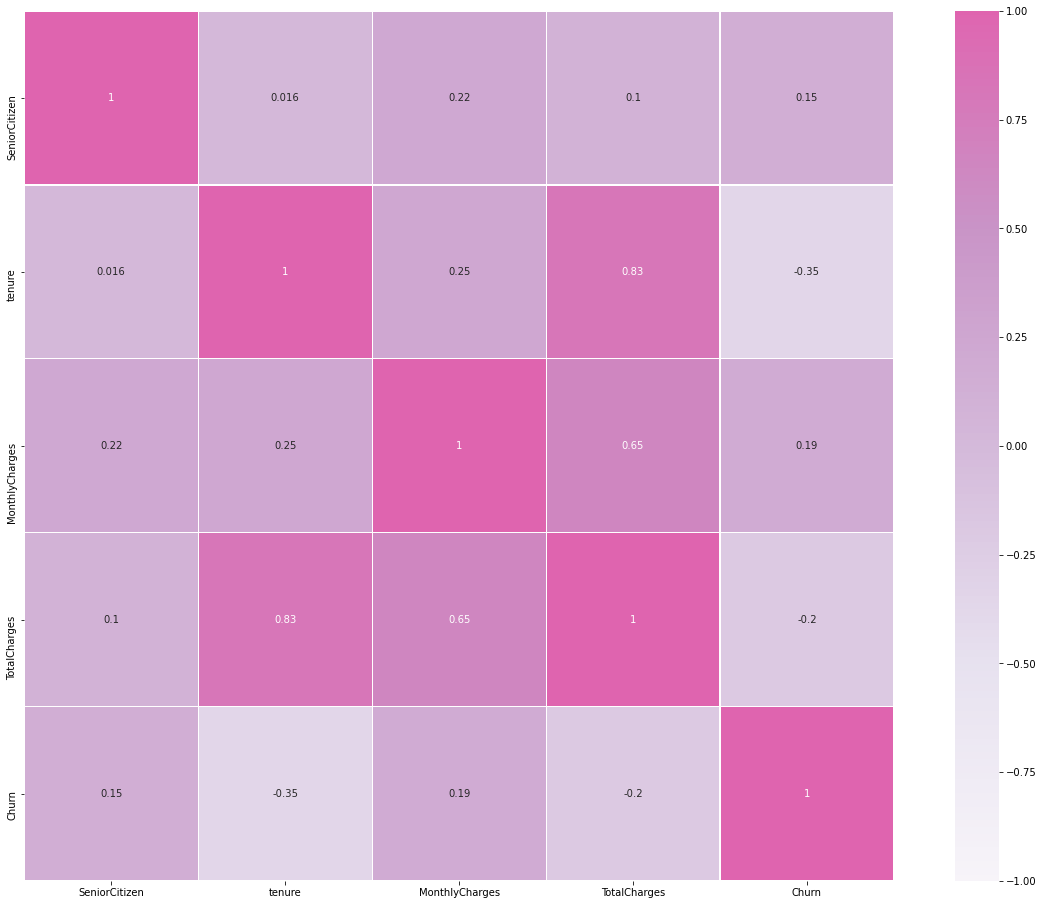

In [67]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='PuRd',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- As we can see there is a correlation between tenure and total charges.
- There is little correlation between monthly charge and total charges.

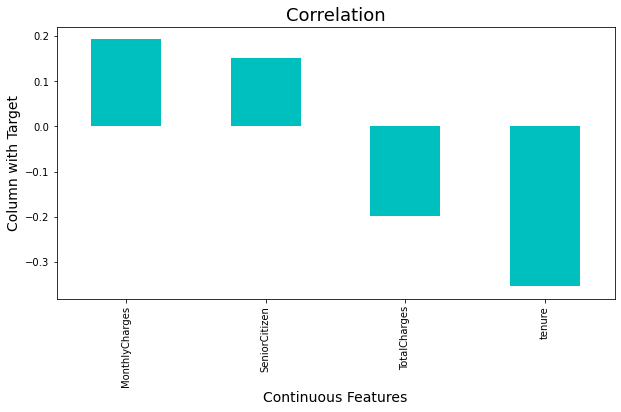

In [70]:
plt.figure(figsize=(10,5))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Continuous Features',fontsize=14)
plt.ylabel('Column with Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Monthly Charges and Senior citizen features are positively related with target variable.
- Total charges and Tenure are negatively related with target variable.

#### Feature engineering:

The independent variable tenure is containing months as tenure. The range is from 1 to 72 months. For more simplicity we are going to combine those months into different groups. Let's do it:

In [17]:
print(df['tenure'].max())   # 72 is the maximum duration as tenure

72


In [18]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]  #12 months is the step size

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)


1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

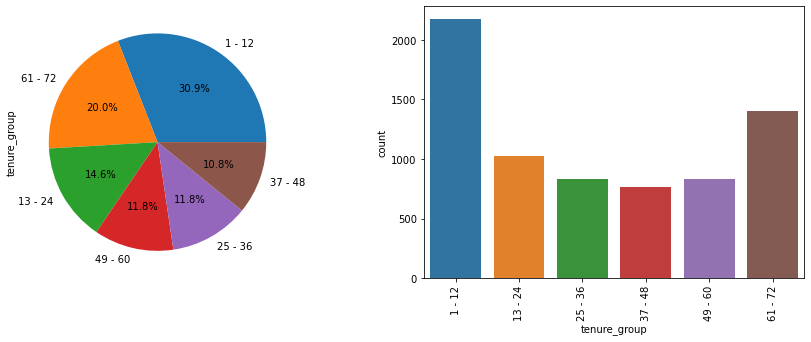

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['tenure_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['tenure_group'])
plt.xticks(rotation=90)
df['tenure_group'].value_counts()

- As we can see, there are diiferent groups of tenure where each group is having 12 months of duration.
- Customers are more likely in tenure 1-12 group than other groups.

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


- Customer Id column is not required for model creation as it contains unique numbers only
- As tenure group is there hence no need to have separate tenure column. 

In [21]:
drop_column=['customerID','tenure']  #DROP ALERT
df=df.drop(columns=drop_column,axis=1)

#### Encoding:
We are going to encode the nominal column by using get_dummies encoder from pandas.

In [22]:
df1 = pd.get_dummies(df)
df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


- As we can see all the nominal columns are encoded and looking good.

Let's check the correlation once again:

In [23]:
corr=df1.corr()
corr.shape

(51, 51)

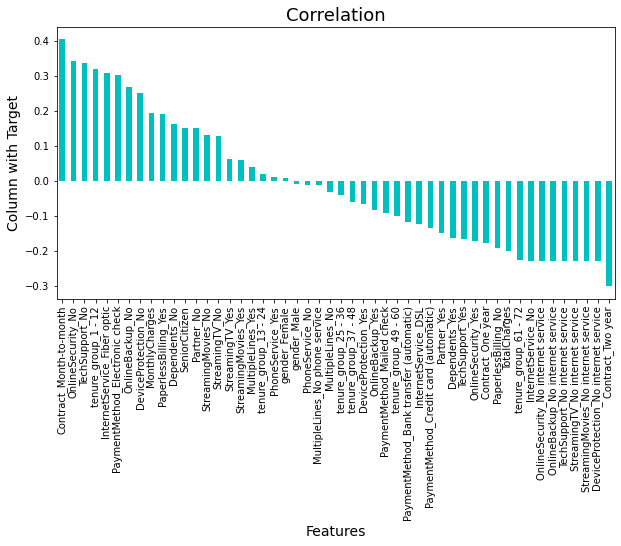

In [24]:
plt.figure(figsize=(10,5))
df1.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- As we can see, some of the features have positive correlation with target and rest of the features are having negative correlation with the feature.

#### Data cleaning and outlier removal:

In [25]:
df.skew()  

SeniorCitizen     1.831103
MonthlyCharges   -0.222103
TotalCharges      0.961642
Churn             1.060622
dtype: float64

- Only Total Charges feature is having skewness.

Now we are going to use power transformer to remove the skewness from the feature.

In [38]:
# We are taking all the skewed continuous feature into single variable
features=['TotalCharges']

In [39]:
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method

In [40]:
df1[features]=scaler.fit_transform(df[features].values) #scaling the feature

In [41]:
df1[features]

,TotalCharges
0,-1.729970
1,0.213698
2,-1.352157
3,0.192038
4,-1.228102
...,...
7038,0.257414
7039,1.634367
7040,-0.869940
7041,-0.928396


- As we can see the feature is looking good and scaled.

Now let's the divide the dataset into target abd featres for model creation.

In [42]:
y=df1['Churn']
x=df1.drop(columns=['Churn'])

- As the target variable is imbalanced, we are going to balance that using SMOTE.

In [43]:
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [44]:
y.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

- As we can see the target variable is balanced. Now let's scale the independent variables


#### Standardization:

In [45]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split) to gauge how well the classifier is working.

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

#### Model Creation:
Now let's see the Accuracy scores according to five models we have used below. we are using models like,

1. Logistic Regression,
2. Decision Tree Classifier,
3. Random Forest Classifier,
4. K-Nearest Neighbors Classifier,
5. Gradient Boosting Classifier


#### 1. Logistic Regression:

In [74]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")
      


=======================Train Result===========================
Accuracy score:85.64%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.839052     0.875440  0.856405     0.857246      0.857307
recall        0.880798     0.832175  0.856405     0.856487      0.856405
f1-score      0.859418     0.853259  0.856405     0.856339      0.856329
support    3859.000000  3885.000000  0.856405  7744.000000   7744.000000
________________________________________________________________
 Confusion Matrix:
[[3399  460]
 [ 652 3233]]



In [75]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")      
      


=======================Test Result of LR ===========================
Accuracy score:85.63%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.843267     0.870809  0.856313     0.857038      0.856900
recall        0.878834     0.833333  0.856313     0.856084      0.856313
f1-score      0.860683     0.851659  0.856313     0.856171      0.856217
support    1304.000000  1278.000000  0.856313  2582.000000   2582.000000
________________________________________________________________
 Confusion Matrix:
[[1146  158]
 [ 213 1065]]



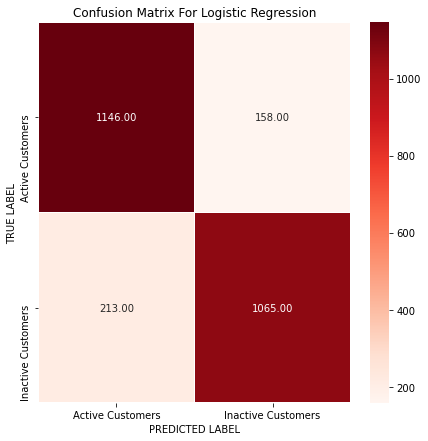

In [76]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['Active Customers','Inactive Customers']
y_axis_labels=['Active Customers','Inactive Customers']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [77]:
#checking ROC_AUC Score of Logistic Regression:
roc_auc_score(y_test,lr.predict(x_test))

0.8560838445807772

#### 2. Decision Tree Classifier :

In [78]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:99.91%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998447     0.999742  0.999096     0.999095      0.999097
recall        0.999741     0.998456  0.999096     0.999098      0.999096
f1-score      0.999094     0.999099  0.999096     0.999096      0.999096
support    3859.000000  3885.000000  0.999096  7744.000000   7744.000000
________________________________________________________________
 Confusion Matrix:
[[3858    1]
 [   6 3879]]



In [79]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")      
      


=======================Test Result of dt_clf===========================
Accuracy score:79.24%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.807200     0.778529  0.792409     0.792864      0.793009
recall        0.773773     0.811424  0.792409     0.792599      0.792409
f1-score      0.790133     0.794636  0.792409     0.792385      0.792362
support    1304.000000  1278.000000  0.792409  2582.000000   2582.000000
________________________________________________________________
 Confusion Matrix:
[[1009  295]
 [ 241 1037]]



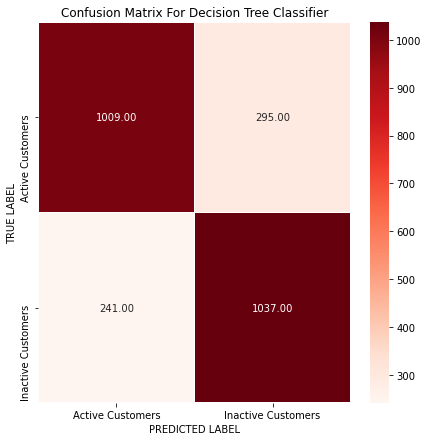

In [80]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['Active Customers','Inactive Customers']
y_axis_labels=['Active Customers','Inactive Customers']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [81]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.7925985531457319

#### 3. Random Forest Classifier :

In [115]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:99.91%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999222     0.998971  0.999096     0.999097      0.999096
recall        0.998963     0.999228  0.999096     0.999096      0.999096
f1-score      0.999093     0.999099  0.999096     0.999096      0.999096
support    3859.000000  3885.000000  0.999096  7744.000000   7744.000000
________________________________________________________________
 Confusion Matrix:
[[3855    4]
 [   3 3882]]



In [116]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")   


=======================Test Result of RF_clf===========================
Accuracy score:85.32%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.865613     0.841306  0.853215     0.853459      0.853582
recall        0.839724     0.866980  0.853215     0.853352      0.853215
f1-score      0.852472     0.853950  0.853215     0.853211      0.853203
support    1304.000000  1278.000000  0.853215  2582.000000   2582.000000
________________________________________________________________
 Confusion Matrix:
[[1095  209]
 [ 170 1108]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

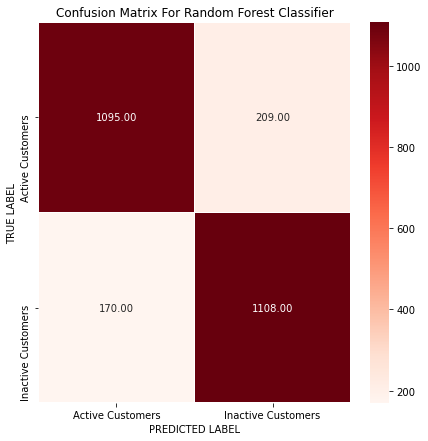

In [117]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['Active Customers','Inactive Customers']
y_axis_labels=['Active Customers','Inactive Customers']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [85]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

0.8564582793283217

#### 4. K-Neighbors Classifier :

In [100]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:88.52%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.925014     0.852471  0.885201     0.888742      0.888621
recall        0.837523     0.932561  0.885201     0.885042      0.885201
f1-score      0.879097     0.890719  0.885201     0.884908      0.884928
support    3859.000000  3885.000000  0.885201  7744.000000   7744.000000
________________________________________________________________
 Confusion Matrix:
[[3232  627]
 [ 262 3623]]



In [101]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:82.38%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.881402     0.780123   0.82378     0.830762      0.831272
recall        0.752301     0.896714   0.82378     0.824507      0.823780
f1-score      0.811750     0.834365   0.82378     0.823057      0.822944
support    1304.000000  1278.000000   0.82378  2582.000000   2582.000000
________________________________________________________________
 Confusion Matrix:
[[ 981  323]
 [ 132 1146]]



Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

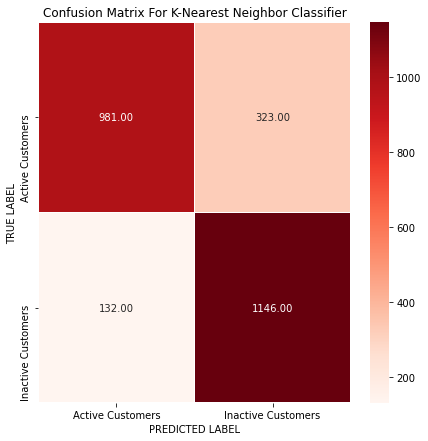

In [88]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['Active Customers','Inactive Customers']
y_axis_labels=['Active Customers','Inactive Customers']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [89]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:

roc_auc_score(y_test,kn.predict(x_test))

0.8245071142602034

#### 5. Gradient Boosting Classifier:

In [90]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:85.64%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.873538     0.840915  0.856405     0.857226      0.857172
recall        0.832340     0.880309  0.856405     0.856324      0.856405
f1-score      0.852442     0.860161  0.856405     0.856301      0.856314
support    3859.000000  3885.000000  0.856405  7744.000000   7744.000000
________________________________________________________________
 Confusion Matrix:
[[3212  647]
 [ 465 3420]]



In [91]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:84.08%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.866886     0.817582  0.840821     0.842234      0.842482
recall        0.809049     0.873239  0.840821     0.841144      0.840821
f1-score      0.836969     0.844495  0.840821     0.840732      0.840694
support    1304.000000  1278.000000  0.840821  2582.000000   2582.000000
________________________________________________________________
 Confusion Matrix:
[[1055  249]
 [ 162 1116]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

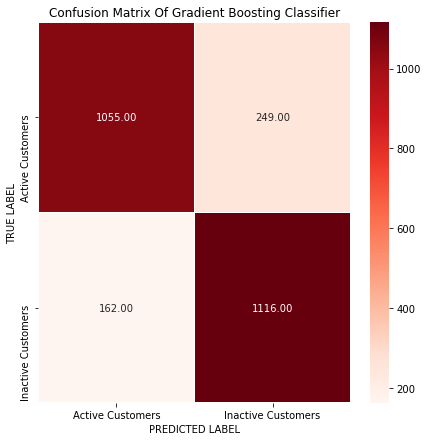

In [92]:
cm = confusion_matrix(y_test,pred)

x_axis_labels=['Active Customers','Inactive Customers']
y_axis_labels=['Active Customers','Inactive Customers']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [93]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.8411442581871598

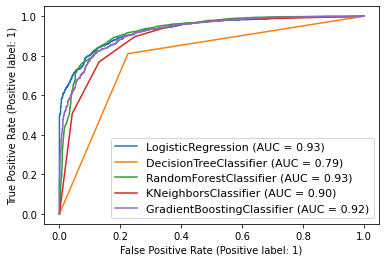

In [94]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Observation: 
We have seen that Random Forest Classifier has given the best accuracy of 85.32 telecom churn prediction. Now let's check the cross validation scores of the models.


####    Cross validation :

   Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.


In [95]:
#Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:83.41%


In [96]:
#Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:79.31%


In [97]:
#Checking Cross Validation
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:84.88%


In [103]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:82.79%


In [104]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:83.33%


Now let's check the difference between Accuracy Score and Cross Validation Score to select the best model from the 5 models:

- Diffrence between Accuracy score and Cross Validation Score of 5 different models :
- LR = 85.63-83.41 = 2.22 
- DT = 79.24-79.31 = -0.07
- Rf = 85.63-84.88 = 0.75 
- KNN = 82.38-82.79 = -0.41
- Gbdt_clf = 84.08-83.33 = 0.75

So, as the accuracy score of random forest classifier is 85.63% and  as the difference of Accuracy Score and CV of Random Forest Classifier is least, it's the best Model. Let's do Hyperparameter Tuning of RFC.

#### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of Random Forest Classifier. After getting the best parameters we can use those with the model to obtain best accuracy.

In [111]:
rf = RandomForestClassifier()
params={'n_estimators':[12,13,15,17],
       'criterion':['gini'],
       'max_depth':[6,13,15,17],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8],'max_features':['auto', 'sqrt','log2'],'random_state': [100]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'gini', 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 17, 'random_state': 100}
con_mat=>  
 [[1054  250]
 [ 160 1118]]
Accuracy of rf After Hyperparameter Tuning==>  84.12083656080557


#### Observation:

After tuning with best parameters of Random forest classifier, it does not increase the accuracy ( 84% ). Let's check the classification report for that.

In [112]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1304
           1       0.82      0.87      0.85      1278

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



- The Classification report is showing less accuracy after Hyperparameter tuning. Hence we will save the prior RFC model as it's accuracy is best.

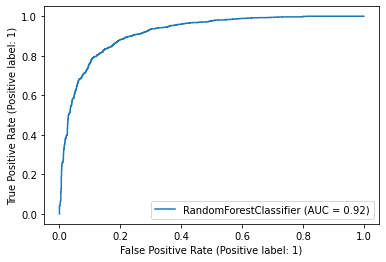

In [113]:
disp = plot_roc_curve(rfc,x_test,y_test)

- As we can conclude, Random Forest Classifier is the best model as the density of area under curve is almost 92%.

Now let's save the best model.

In [118]:
# model prediction using RF
x_predict = list(rf.predict(x_test))
rf_churn = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_churn))

       predicted_values  orignal_values
4139                  1               1
1692                  0               0
2692                  0               0
7704                  1               1
321                   0               0
...                 ...             ...
3710                  1               1
9131                  1               1
9081                  1               1
4038                  0               1
10050                 1               1

[2582 rows x 2 columns]


In [119]:
#import joblib
import joblib

joblib.dump(rf,'rf_churn_file.obj')

# SAVING THE MODEL

['rf_churn_file.obj']

In [121]:
rf_from_joblib=joblib.load('rf_churn_file.obj')
rf_from_joblib.predict(x_test)
#TESTING THE SAVED MODEL

array([1, 0, 0, ..., 1, 0, 1])

#### Conclusion:

The Telecom Customer Churn dataset is good blend of continuous, categorical and nominal columns. Where we need to predict and prevent customer churn by using those important features.
- After analysing the data we have seen that total monthly charge for 72 months or 6 years is 8550, but if a customer is having month to month contract with the service, he or she may spending more money for that.
- There should be more tech supports.
- For internet sevice customers more tend to use Fiber optics but maybe the service is not that good hence, inactive customers are more in numbers.
After analyzing these data, we have made 5 different models. Out of which Random Forest Classifier has given the best accuracy regarding customer churn, that is 84%.